In [ ]:
# sklearn libraries for model building and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Decision tree code

In [ ]:
# Decison Tree Classifier
# Time taken to run: 1min 40s 

# Create decision tree classifiers for each attack type
clf_DoS = DecisionTreeClassifier(random_state=0)
clf_DoS_features = DecisionTreeClassifier(random_state=0)
clf_Probe = DecisionTreeClassifier(random_state=0)
clf_Probe_features = DecisionTreeClassifier(random_state=0)
clf_R2L = DecisionTreeClassifier(random_state=0)
clf_R2L_features = DecisionTreeClassifier(random_state=0)
clf_U2R = DecisionTreeClassifier(random_state=0)
clf_U2R_features = DecisionTreeClassifier(random_state=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

stratified_k_fold = StratifiedKFold(n_splits=5)

# Perform grid search cross-validation to find the best hyperparameters for each classifier
grid_search_DoS = GridSearchCV(clf_DoS, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_DoS_features = GridSearchCV(clf_DoS_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_Probe = GridSearchCV(clf_Probe, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_Probe_features = GridSearchCV(clf_Probe_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_R2L = GridSearchCV(clf_R2L, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_R2L_features = GridSearchCV(clf_R2L_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_U2R = GridSearchCV(clf_U2R, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_U2R_features = GridSearchCV(clf_U2R_features, param_grid, cv=stratified_k_fold, n_jobs=-1)

# Fit the classifiers on the training data
grid_search_DoS.fit(X_DoS, Y_DoS.astype(int))
grid_search_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
grid_search_Probe.fit(X_Probe, Y_Probe.astype(int))
grid_search_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
grid_search_R2L.fit(X_R2L, Y_R2L.astype(int))
grid_search_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
grid_search_U2R.fit(X_U2R, Y_U2R.astype(int))
grid_search_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

# Print the best parameters
print("Best parameters for DoS classifier:", grid_search_DoS.best_params_)
print("Best parameters for DoS classifier with features:", grid_search_DoS_features.best_params_)
print("Best parameters for Probe classifier:", grid_search_Probe.best_params_)
print("Best parameters for Probe classifier with features:", grid_search_Probe_features.best_params_)
print("Best parameters for R2L classifier:", grid_search_R2L.best_params_)
print("Best parameters for R2L classifier with features:", grid_search_R2L_features.best_params_)
print("Best parameters for U2R classifier:", grid_search_U2R.best_params_)
print("Best parameters for U2R classifier with features:", grid_search_U2R_features.best_params_)

best_clf_DoS = grid_search_DoS.best_estimator_
best_clf_DoS_features = grid_search_DoS_features.best_estimator_
best_clf_Probe = grid_search_Probe.best_estimator_
best_clf_Probe_features = grid_search_Probe_features.best_estimator_
best_clf_R2L = grid_search_R2L.best_estimator_
best_clf_R2L_features = grid_search_R2L_features.best_estimator_
best_clf_U2R = grid_search_U2R.best_estimator_
best_clf_U2R_features = grid_search_U2R_features.best_estimator_

Best parameters for DoS classifier: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for DoS classifier with features: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best parameters for Probe classifier: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for Probe classifier with features: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for R2L classifier: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for R2L classifier with features: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for U2R classifier: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best parameters for U2R classifier with features: {'criterion': 'entropy', 'max_de

## Decision tree evaluation

### DoS Evaluation

Confusion Matrix for DoS:
[[9507  204]
 [2660 4800]]
Accuracy: 0.8332071515928018


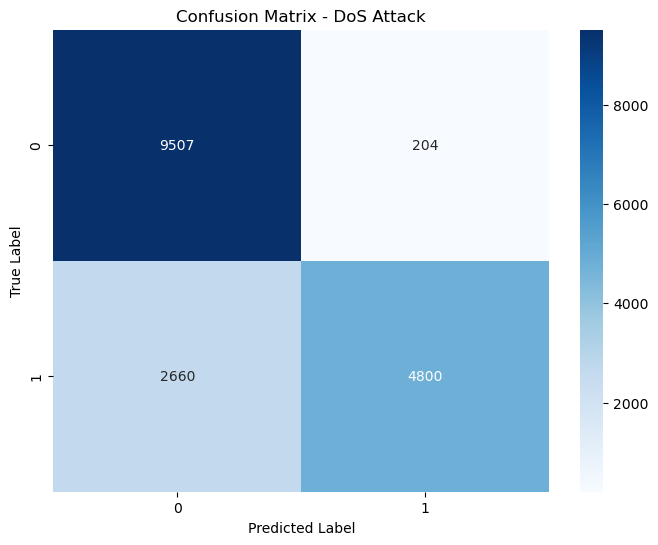

Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      9711
           1       0.96      0.64      0.77      7460

    accuracy                           0.83     17171
   macro avg       0.87      0.81      0.82     17171
weighted avg       0.86      0.83      0.83     17171

AUC-ROC Score for DoS Prediction: 0.8112778811678969


In [ ]:
Y_DoS_pred=best_clf_DoS.predict(X_DoS_test)
# Create confusion matrix
cm_DoS = confusion_matrix(Y_DoS_test, Y_DoS_pred)
print("Confusion Matrix for DoS:")
print(cm_DoS)
accuracy_DoS = accuracy_score(Y_DoS_test, Y_DoS_pred)
print("Accuracy:", accuracy_DoS)

# Visualise the confusion matrix for clf_DoS
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for DoS:")
print(classification_report(Y_DoS_test, Y_DoS_pred))

# Calculate the predicted probabilities for the positive class (DoS attack)
Y_DoS_pred_proba = best_clf_DoS.predict_proba(X_DoS_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_DoS_test, Y_DoS_pred_proba)
print("AUC-ROC Score for DoS Prediction:", auc_roc_score)

### DoS Evaluation with feature selection

Confusion Matrix for DoS with feature selection:
[[8577 1134]
 [1955 5505]]
Accuracy: 0.8201036631529905


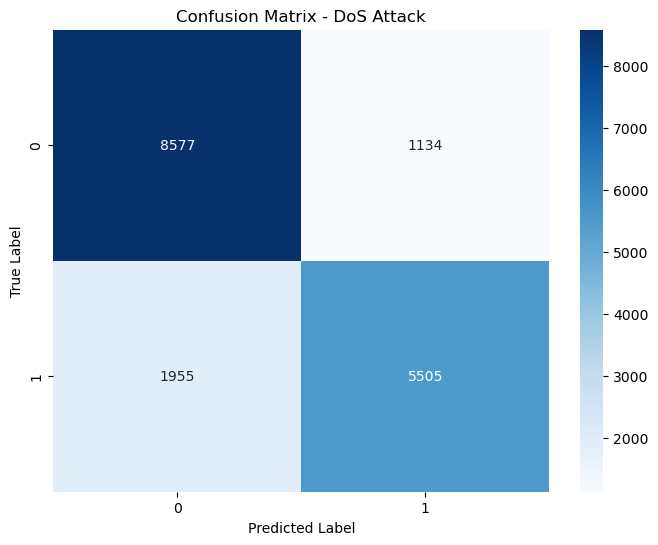

Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      9711
           1       0.83      0.74      0.78      7460

    accuracy                           0.82     17171
   macro avg       0.82      0.81      0.81     17171
weighted avg       0.82      0.82      0.82     17171

AUC-ROC Score for DoS Prediction: 0.8116815305492265


In [ ]:
# Make predictions on the test set
Y_DoS_pred = best_clf_DoS_features.predict(X_newDoS_test)

# Create confusion matrix
cm_DoS = confusion_matrix(Y_DoS_test, Y_DoS_pred)
print("Confusion Matrix for DoS with feature selection:")
print(cm_DoS)

# Calculate accuracy
accuracy_DoS = accuracy_score(Y_DoS_test, Y_DoS_pred)
print("Accuracy:", accuracy_DoS)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for DoS:")
print(classification_report(Y_DoS_test, Y_DoS_pred))

# Calculate the predicted probabilities for the positive class (DoS attack)
# Ensure to use the transformed test set
Y_DoS_pred_proba = best_clf_DoS_features.predict_proba(X_newDoS_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_DoS_test, Y_DoS_pred_proba)
print("AUC-ROC Score for DoS Prediction:", auc_roc_score)

### Probe prediction

Confusion Matrix for Probe:
[[8654 1057]
 [ 372 2049]]
Accuracy: 0.8822123310253874


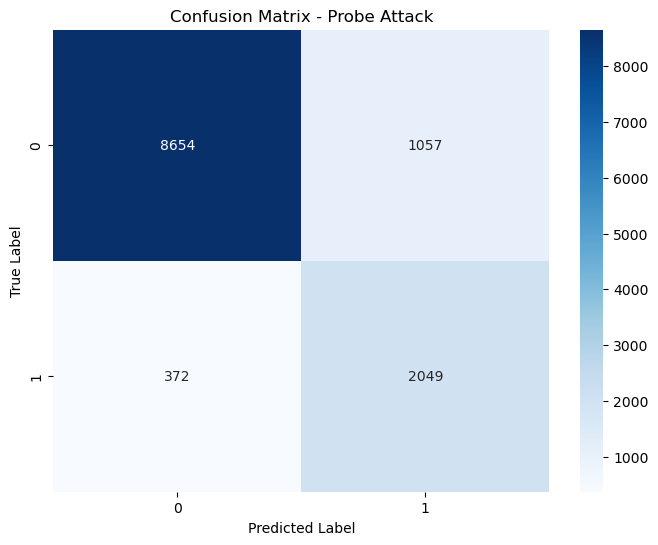

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      9711
           2       0.66      0.85      0.74      2421

    accuracy                           0.88     12132
   macro avg       0.81      0.87      0.83     12132
weighted avg       0.90      0.88      0.89     12132

AUC-ROC Score for Probe Prediction: 0.8687494233917846


In [ ]:
Y_Probe_pred=best_clf_Probe.predict(X_Probe_test)
# Create confusion matrix
cm_Probe = confusion_matrix(Y_Probe_test, Y_Probe_pred)
print("Confusion Matrix for Probe:")
print(cm_Probe)
accuracy_Probe = accuracy_score(Y_Probe_test, Y_Probe_pred)
print("Accuracy:", accuracy_Probe)

# Visualise the confusion matrix for clf_Probe
plt.figure(figsize=(8, 6))
sns.heatmap(cm_Probe, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Probe Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for Probe:")
print(classification_report(Y_Probe_test, Y_Probe_pred))

# Calculate the predicted probabilities for the positive class (Probe attack)
Y_Probe_pred_proba = best_clf_Probe.predict_proba(X_Probe_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_Probe_test, Y_Probe_pred_proba)
print("AUC-ROC Score for Probe Prediction:", auc_roc_score)

### Probe prediction with feature selection

Confusion Matrix for Probe with features:
[[9442  269]
 [ 740 1681]]
Accuracy: 0.916831519947247


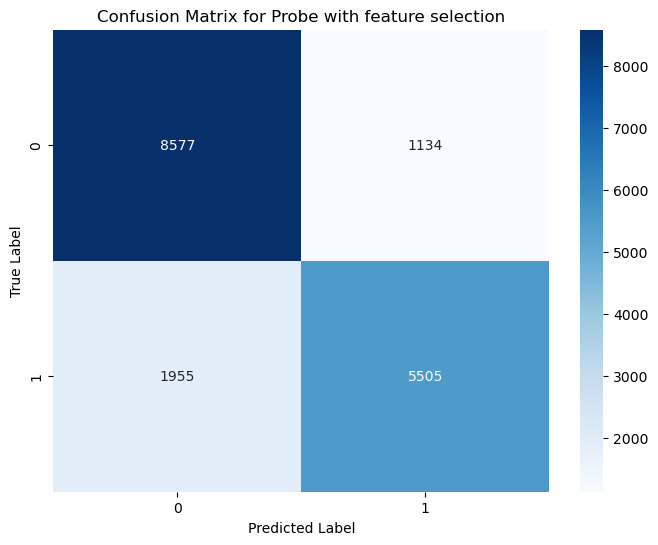

Classification Report for Probe with feature selection:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9711
           2       0.86      0.69      0.77      2421

    accuracy                           0.92     12132
   macro avg       0.89      0.83      0.86     12132
weighted avg       0.91      0.92      0.91     12132

AUC-ROC Score for Probe with feature selection: 0.8341060361931953


In [ ]:
# Make predictions on the test set
Y_Probe_pred = best_clf_Probe_features.predict(X_newProbe_test)

# Create confusion matrix
cm_Probe = confusion_matrix(Y_Probe_test, Y_Probe_pred)
print("Confusion Matrix for Probe with features:")
print(cm_Probe)

# Calculate accuracy
accuracy_Probe = accuracy_score(Y_Probe_test, Y_Probe_pred)
print("Accuracy:", accuracy_Probe)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Probe with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for Probe with feature selection:")
print(classification_report(Y_Probe_test, Y_Probe_pred))

# Calculate the predicted probabilities for the positive class (Probe attack)
# Ensure to use the transformed test set
Y_Probe_pred_proba = best_clf_Probe_features.predict_proba(X_newProbe_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_Probe_test, Y_Probe_pred_proba)
print("AUC-ROC Score for Probe with feature selection:", auc_roc_score)

### R2L prediction

Confusion Matrix for R2L:
[[9697   14]
 [2570  315]]
Accuracy: 0.7948555096856145


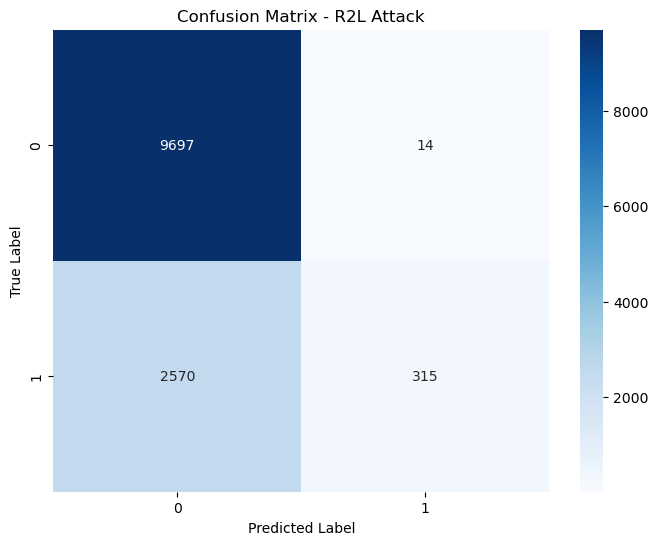

Classification Report for R2L:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9711
           3       0.96      0.11      0.20      2885

    accuracy                           0.79     12596
   macro avg       0.87      0.55      0.54     12596
weighted avg       0.83      0.79      0.73     12596

AUC-ROC Score for DoS Prediction: 0.553871888924404


In [ ]:
Y_R2L_pred=best_clf_R2L.predict(X_R2L_test)
# Create confusion matrix
cm_R2L = confusion_matrix(Y_R2L_test, Y_R2L_pred)
print("Confusion Matrix for R2L:")
print(cm_R2L)
accuracy_R2L = accuracy_score(Y_R2L_test, Y_R2L_pred)
print("Accuracy:", accuracy_R2L)

# Visualise the confusion matrix for clf_R2L
plt.figure(figsize=(8, 6))
sns.heatmap(cm_R2L, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - R2L Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for R2L:")
print(classification_report(Y_R2L_test, Y_R2L_pred))

# Calculate the predicted probabilities for the positive class (R2L attack)
Y_R2L_pred_proba = best_clf_R2L.predict_proba(X_R2L_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_R2L_test, Y_R2L_pred_proba)
print("AUC-ROC Score for DoS Prediction:", auc_roc_score)

### R2L prediction with feature selection

Confusion Matrix for R2L:
[[9709    2]
 [2787   98]]
Accuracy: 0.7785805017465862


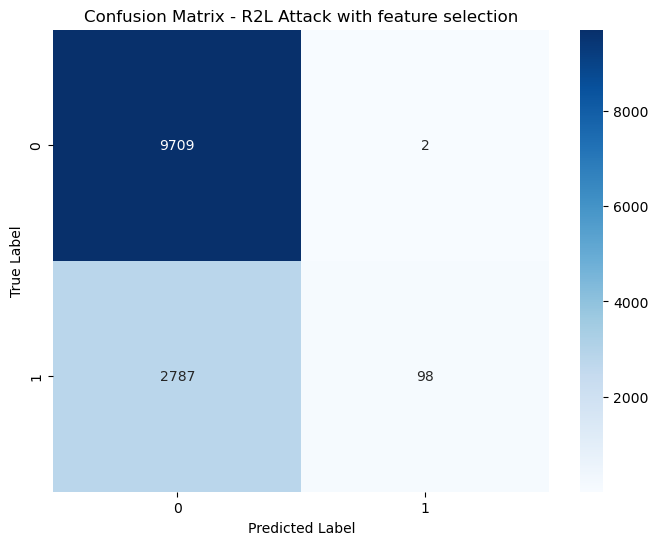

Classification Report for R2L:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      9711
           3       0.98      0.03      0.07      2885

    accuracy                           0.78     12596
   macro avg       0.88      0.52      0.47     12596
weighted avg       0.82      0.78      0.69     12596

AUC-ROC Score for R2L Prediction: 0.5168814260731323


In [ ]:
# Make predictions on the test set
Y_R2L_pred = best_clf_R2L_features.predict(X_newR2L_test)

# Create confusion matrix
cm_R2L = confusion_matrix(Y_R2L_test, Y_R2L_pred)
print("Confusion Matrix for R2L:")
print(cm_R2L)

# Calculate accuracy
accuracy_R2L = accuracy_score(Y_R2L_test, Y_R2L_pred)
print("Accuracy:", accuracy_R2L)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_R2L, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - R2L Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for R2L:")
print(classification_report(Y_R2L_test, Y_R2L_pred))

# Calculate the predicted probabilities for the positive class (R2L attack)
# Ensure to use the transformed test set
Y_R2L_pred_proba = best_clf_R2L_features.predict_proba(X_newR2L_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_R2L_test, Y_R2L_pred_proba)
print("AUC-ROC Score for R2L Prediction:", auc_roc_score)

### U2R prediction

Confusion Matrix for U2R:
[[9707    4]
 [  53   14]]
Accuracy: 0.9941705870321129


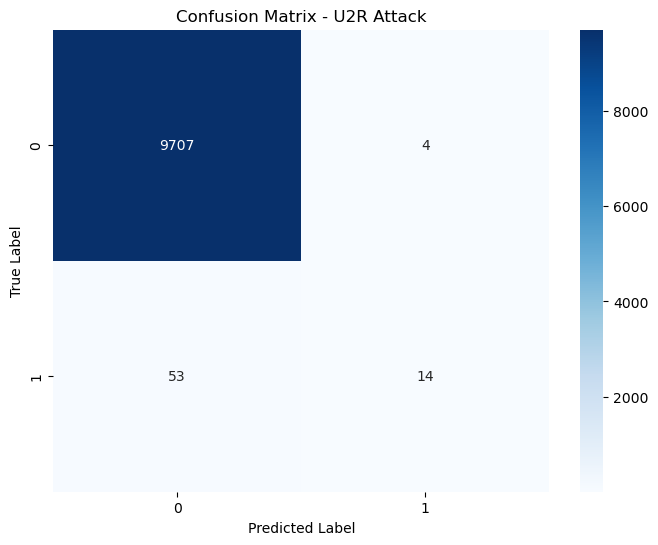

Classification Report for U2R:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           4       0.78      0.21      0.33        67

    accuracy                           0.99      9778
   macro avg       0.89      0.60      0.66      9778
weighted avg       0.99      0.99      0.99      9778

AUC-ROC Score for U2R Prediction: 0.3983565336739226


In [ ]:
Y_U2R_pred=best_clf_U2R.predict(X_U2R_test)
# Create confusion matrix
cm_U2R = confusion_matrix(Y_U2R_test, Y_U2R_pred)
print("Confusion Matrix for U2R:")
print(cm_U2R)
accuracy_U2R = accuracy_score(Y_U2R_test, Y_U2R_pred)
print("Accuracy:", accuracy_U2R)

# Visualise the confusion matrix for clf_U2R
plt.figure(figsize=(8, 6))
sns.heatmap(cm_U2R, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - U2R Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for U2R:")
print(classification_report(Y_U2R_test, Y_U2R_pred))

# Calculate the predicted probabilities for the positive class (U2R attack)
Y_U2R_pred_proba = best_clf_U2R.predict_proba(X_U2R_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_U2R_test, Y_U2R_pred_proba)
print("AUC-ROC Score for U2R Prediction:", auc_roc_score)

### U2R prediction with feature selection

Confusion Matrix for U2R:
[[9707    4]
 [  41   26]]
Accuracy: 0.9953978318674576


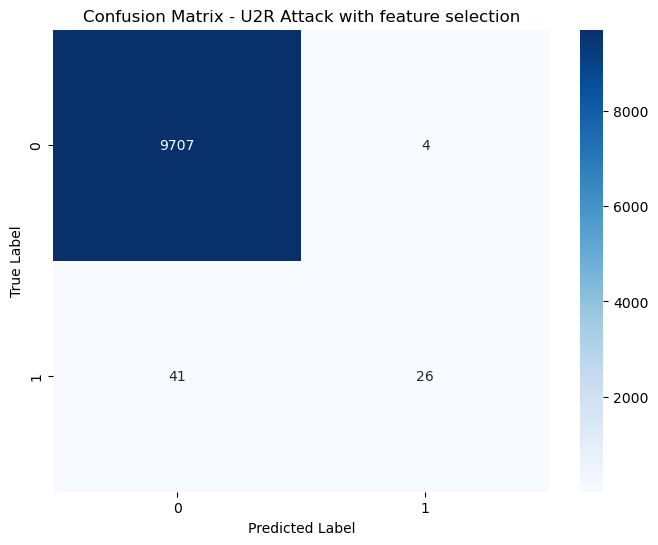

Classification Report for U2R:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           4       0.87      0.39      0.54        67

    accuracy                           1.00      9778
   macro avg       0.93      0.69      0.77      9778
weighted avg       0.99      1.00      0.99      9778

AUC-ROC Score for U2R Prediction: 0.7081852092641518


In [ ]:
# Make predictions on the test set
Y_U2R_pred = best_clf_U2R_features.predict(X_newU2R_test)

# Create confusion matrix
cm_U2R = confusion_matrix(Y_U2R_test, Y_U2R_pred)
print("Confusion Matrix for U2R:")
print(cm_U2R)

# Calculate accuracy
accuracy_U2R = accuracy_score(Y_U2R_test, Y_U2R_pred)
print("Accuracy:", accuracy_U2R)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_U2R, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - U2R Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for U2R:")
print(classification_report(Y_U2R_test, Y_U2R_pred))

# Calculate the predicted probabilities for the positive class (U2R attack)
# Ensure to use the transformed test set
Y_U2R_pred_proba = best_clf_U2R_features.predict_proba(X_newU2R_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_U2R_test, Y_U2R_pred_proba)
print("AUC-ROC Score for U2R Prediction:", auc_roc_score)